# Search Tool Members of the Parliament: TwitterAPI Failure Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import tweepy
from tqdm.notebook import tqdm

In [3]:
twitter_credentials = []
with open('../../../../twitter_credentials.json', 'r') as f:
    twitter_credentials = json.load(f)        

# TwitterAPI Authentication
auth = tweepy.OAuthHandler(twitter_credentials['consumer_key'],
                                   twitter_credentials['consumer_secret'])
auth.set_access_token(twitter_credentials['access_token_key'],
                              twitter_credentials['access_token_secret'])
API = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True, timeout=60*5)

# Fullnames

In [3]:
fn = pd.read_csv('Twitter-Search-Fullnames-Parliament-Members.csv')
fn = fn.replace(np.nan, '')
fn.head()

,Name (Long),Surname,Name,Party,Twitter Handle,Result 1,Result 2,Result 3,Result 4,Result 5,...,Result 11,Result 12,Result 13,Result 14,Result 15,Result 16,Result 17,Result 18,Result 19,Result 20
0,Βιλιάρδος Διονυσίου Βασίλειος,Βιλιάρδος,Βιλιάρδος Βασίλειος,ΕΛΛΗΝΙΚΗ ΛΥΣΗ,ViliardosV,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Αλεξοπούλου Κωνσταντίνου Αναστασία - Αικατερίνη,Αλεξοπούλου,Αλεξοπούλου Αικατερίνη,ΕΛΛΗΝΙΚΗ ΛΥΣΗ,anaik2020,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Αθανασίου Ευαγγέλου Μαρία,Αθανασίου,Αθανασίου Μαρία,ΕΛΛΗΝΙΚΗ ΛΥΣΗ,MariaAt03902914,2801769645,1369317869264248838,3883801823,4841853117,1352034271477837826,...,1272520399973232640,774353219464093696,712359665833795585,905126924397281282,513081418,1263928166546096129,3346441403,764794474144858112,4841988202,409176426
3,Βαγενάς Κωνσταντίνου Δημήτριος,Βαγενάς,Βαγενάς Δημήτριος,ΕΛΛΗΝΙΚΗ ΛΥΣΗ,B3Vagenas,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Ασημακοπούλου Δημητρίου Σοφία - Χάιδω,Ασημακοπούλου,Ασημακοπούλου Χάιδω,ΕΛΛΗΝΙΚΗ ΛΥΣΗ,SofAsimak,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
def get_ids(df):
    true_id = []
    for acc in tqdm(df):
        if acc != '':
            try:
                user = API.get_user(acc)
                true_id.append(user.id)
            except:
                print(acc)
                true_id.append(0)
        else:
            true_id.append(0)
    return true_id

In [6]:
cols = ['Twitter Handle']
for col in cols:
    fn[col] = get_ids(fn[col])

  0%|          | 0/300 [00:00<?, ?it/s]

xtarantilis
katsafados
stergiannakis


## With a Twitter Account 

In [35]:
fn_acc = fn[fn['Twitter Handle'] != 0].copy() 

In [36]:
top1 = [False for i in range(len(fn_acc))]
top5 = [False for i in range(len(fn_acc))]
top10 = [False for i in range(len(fn_acc))]

for i, acc in enumerate(fn_acc['Twitter Handle']):
    for j,res in enumerate(fn_acc[[f'Result {k+1}' for k in range(10)]].iloc[i].unique()):
        if acc == res:
            if j < 1:
                top1[i] = True
            elif 0 < j < 6:
                top5[i] = True
            else:
                top10[j] = True

In [37]:
found = [a or b or c for a,b,c in zip(top1,top5,top10)]

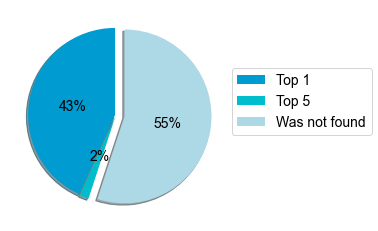

In [38]:
fig, ax = plt.subplots()
color_palette_list = ['#009BD0', '#00BDCC', '#ADD8E6']

plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor']= 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['font.size']=14

x = [top1.count(True), top5.count(True), found.count(False)]
labels = ['Top 1', 'Top 5' ,'Was not found']
_=ax.pie(x, colors=color_palette_list,
         autopct='%1.0f%%', shadow=True, startangle=90, pctdistance=0.5,labeldistance=1.3, explode=(0.01,0.01,0.1))
ax.legend(frameon=True, bbox_to_anchor=(1,0.75), labels=labels)

### Export Results

In [16]:
rs = pd.read_csv('../result-method-parliament-member-search.csv')
rs.head(2)

,Name,GoogleAPI Fullnames,GoogleAPI Surnames
0,Βιλιάρδος Βασίλειος,True,True
1,Αλεξοπούλου Αικατερίνη,True,False


In [17]:
rs['TwitterAPI Fullnames'] = found

In [19]:
rs.to_csv('../result-method-parliament-member-search.csv', index=False)

In [20]:
del rs

## Without a Twitter Account 

In [21]:
target_names = ['Has an Account', 'Does not have a Account']

In [22]:
fn_noacc = fn[fn['Twitter Handle'] == 0].copy() 

In [23]:
correct = []
for i, acc in enumerate(fn_noacc['Twitter Handle']):
    if acc == fn_noacc['Result 1'].iloc[i]:
        correct.append(True)
    else:
        correct.append(False)         

In [24]:
correct.count(True), correct.count(False)

(46, 16)

## Final Results

In [25]:
fin_result = np.array([[found.count(True),correct.count(True)],
                      [found.count(False),correct.count(False)]])
fin_result

array([[107,  46],
       [131,  16]])

<AxesSubplot:>

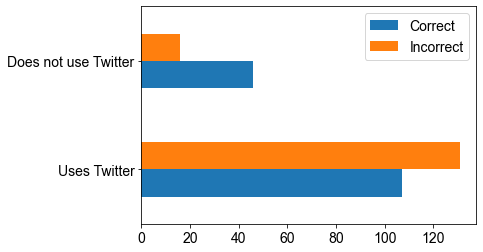

In [33]:
pd.DataFrame(fin_result, 
             columns=['Uses Twitter', 'Does not use Twitter'], 
             index=['Correct', 'Incorrect']).T.plot(kind='barh')

## Do Result Include other Parliament Members ?

In [27]:
par_accs = list(fn_acc['Twitter Handle'])

In [28]:
counts = [0 for i in range(len(fn))]
for i, tr in enumerate(fn['Twitter Handle']):
    for j,res in enumerate(fn[[f'Result {k+1}' for k in range(7)]].iloc[i].unique()):
        for acc in par_accs:
            if res == acc and res != tr:
                counts[i] += 1

In [29]:
fn['Total Parl Results'] = counts

In [30]:
len(fn[fn['Total Parl Results'] != 0])

0

---
# Surnames

In [41]:
fn = pd.read_csv('Twitter-Search-Surnames-Parliament-Members.csv')
fn = fn.replace(np.nan, '')
fn.head()

,Name (Long),Surname,Name,Party,Twitter Handle,Result 1,Result 2,Result 3,Result 4,Result 5,...,Result 11,Result 12,Result 13,Result 14,Result 15,Result 16,Result 17,Result 18,Result 19,Result 20
0,Βιλιάρδος Διονυσίου Βασίλειος,Βιλιάρδος,Βιλιάρδος Βασίλειος,ΕΛΛΗΝΙΚΗ ΛΥΣΗ,ViliardosV,174226430,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Αλεξοπούλου Κωνσταντίνου Αναστασία - Αικατερίνη,Αλεξοπούλου,Αλεξοπούλου Αικατερίνη,ΕΛΛΗΝΙΚΗ ΛΥΣΗ,anaik2020,126143952,93629265,282486425,2596344709,167572986,...,2569485777,2329900741,2694843255,2370663787,4641601163,1373670869613084674,507489429,4209308067,3110162349,1189778967546474498
2,Αθανασίου Ευαγγέλου Μαρία,Αθανασίου,Αθανασίου Μαρία,ΕΛΛΗΝΙΚΗ ΛΥΣΗ,MariaAt03902914,965785002,2840171877,424495304,1847450509,484212704,...,1697401291,1050337249496391681,799200059464318976,3253495824,2466023912,582976052,984469619023994880,705406032,886626800,860197691447549954
3,Βαγενάς Κωνσταντίνου Δημήτριος,Βαγενάς,Βαγενάς Δημήτριος,ΕΛΛΗΝΙΚΗ ΛΥΣΗ,B3Vagenas,1977451178,1049215741,1534824312,1264145037929185280,739463983405662208,...,2400905457,1302266183790604290,3167304245,4219002089,1209556114725130240,3351186423,970798547460395008,3244790992,2161086549,704032421696643073
4,Ασημακοπούλου Δημητρίου Σοφία - Χάιδω,Ασημακοπούλου,Ασημακοπούλου Χάιδω,ΕΛΛΗΝΙΚΗ ΛΥΣΗ,SofAsimak,533041104,998828010181709825,1148229718627540992,405567257,1216171735,...,3107550591,3029871778,1851852092,863376977331400705,2463333126,842354478,1361908210068836353,4179542776,3172032267,3923205689


In [42]:
def get_ids(df):
    true_id = []
    for acc in tqdm(df):
        if acc != '':
            try:
                user = API.get_user(acc)
                true_id.append(user.id)
            except:
                print(acc)
                true_id.append(0)
        else:
            true_id.append(0)
    return true_id

In [44]:
cols = ['Twitter Handle']
for col in cols:
    fn[col] = get_ids(fn[col])

  0%|          | 0/300 [00:00<?, ?it/s]

xtarantilis
katsafados
stergiannakis


## With a Twitter Account 

In [45]:
fn_acc = fn[fn['Twitter Handle'] != 0].copy() 

In [46]:
top1 = [False for i in range(len(fn_acc))]
top5 = [False for i in range(len(fn_acc))]
top10 = [False for i in range(len(fn_acc))]

for i, acc in enumerate(fn_acc['Twitter Handle']):
    for j,res in enumerate(fn_acc[[f'Result {k+1}' for k in range(10)]].iloc[i].unique()):
        if acc == res:
            if j < 1:
                top1[i] = True
            elif 0 < j < 6:
                top5[i] = True
            else:
                top10[j] = True

In [47]:
found = [a or b or c for a,b,c in zip(top1,top5,top10)]

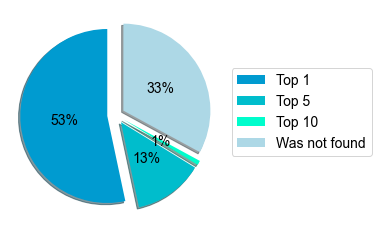

In [62]:
fig, ax = plt.subplots()
color_palette_list = ['#009BD0', '#00BDCC','#00FDCC','#ADD8E6']

plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor']= 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['font.size']=14

x = [top1.count(True), top5.count(True), top10.count(True), found.count(False)]
labels = ['Top 1', 'Top 5', 'Top 10' ,'Was not found']
_=ax.pie(x, colors=color_palette_list,
         autopct='%1.0f%%', shadow=True, startangle=90, pctdistance=0.5,labeldistance=1.3, explode=(0.1,0.1,0.1,0.1))
ax.legend(frameon=True, bbox_to_anchor=(1,0.75), labels=labels)

### Export Results

In [63]:
temp = pd.read_csv('../result-method-parliament-member-search.csv')
temp.head()

,Name,GoogleAPI Fullnames,GoogleAPI Surnames,TwitterAPI Fullnames
0,Βιλιάρδος Βασίλειος,True,True,False
1,Αλεξοπούλου Αικατερίνη,True,False,False
2,Αθανασίου Μαρία,True,False,False
3,Βαγενάς Δημήτριος,True,True,False
4,Ασημακοπούλου Χάιδω,False,False,False


In [64]:
temp['TwitterAPI Surnames'] = found

In [65]:
temp.to_csv('../result-method-parliament-member-search.csv', index=False)

In [66]:
del temp

## Without a Twitter Account 

In [67]:
target_names = ['Has an Account', 'Does not have a Account']

In [68]:
fn_noacc = fn[fn['Twitter Handle'] == 0].copy() 

In [69]:
correct = []
for i, acc in enumerate(fn_noacc['Twitter Handle']):
    if acc == fn_noacc['Result 1'].iloc[i]:
        correct.append(True)
    else:
        correct.append(False)         

In [70]:
correct.count(True), correct.count(False)

(7, 55)

## Final Results

In [71]:
fin_result = np.array([[found.count(True),correct.count(True)],
                      [found.count(False),correct.count(False)]])
fin_result

array([[159,   7],
       [ 79,  55]])

<AxesSubplot:>

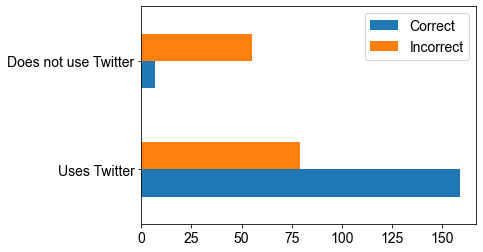

In [72]:
pd.DataFrame(fin_result, 
             columns=['Uses Twitter', 'Does not use Twitter'], 
             index=['Correct', 'Incorrect']).T.plot(kind='barh')

## Do Result Include other Parliament Members ?

In [73]:
par_accs = list(fn_acc['Twitter Handle'])

In [74]:
counts = [0 for i in range(len(fn))]
for i, tr in enumerate(fn['Twitter Handle']):
    for j,res in enumerate(fn[[f'Result {k+1}' for k in range(7)]].iloc[i].unique()):
        for acc in par_accs:
            if res == acc and res != tr:
                counts[i] += 1

In [75]:
fn['Total Parl Results'] = counts

In [76]:
len(fn[fn['Total Parl Results'] != 0])

17

---
# Surnames Greeklish

In [91]:
fn = pd.read_csv('Twitter-Search-SurnamesLatin-Parliament-Members.csv')
fn = fn.replace(np.nan, '')
fn.head()

,Name (Long),Surname,Name,Party,Twitter Handle,Result 1,Result 2,Result 3,Result 4,Result 5,...,Result 11,Result 12,Result 13,Result 14,Result 15,Result 16,Result 17,Result 18,Result 19,Result 20
0,Βιλιάρδος Διονυσίου Βασίλειος,Βιλιάρδος,Βιλιάρδος Βασίλειος,ΕΛΛΗΝΙΚΗ ΛΥΣΗ,ViliardosV,174226430,246390608,849013729,856448283547320322,1032949155314970624,...,0,0,0,0,0,0,0,0,0,0
1,Αλεξοπούλου Κωνσταντίνου Αναστασία - Αικατερίνη,Αλεξοπούλου,Αλεξοπούλου Αικατερίνη,ΕΛΛΗΝΙΚΗ ΛΥΣΗ,anaik2020,320162191,73234260,3373083677,1187678476977000448,1109429795962662912,...,1168241295149740038,263784628,599366320,171661692,1325123115366707200,576183073,1194241307251789826,51597099,223945318,72824620
2,Αθανασίου Ευαγγέλου Μαρία,Αθανασίου,Αθανασίου Μαρία,ΕΛΛΗΝΙΚΗ ΛΥΣΗ,MariaAt03902914,1088970967,880033291,2591503675,2495322266,103608120,...,35453950,517875912,812762451485818881,230836510,53700015,421787378,1192655092400283648,703958160,711712332,38287046
3,Βαγενάς Κωνσταντίνου Δημήτριος,Βαγενάς,Βαγενάς Δημήτριος,ΕΛΛΗΝΙΚΗ ΛΥΣΗ,B3Vagenas,253071752,3340651392,808532589640171520,277694245,879300336,...,63101531,538678651,403661679,137151534,1049215741,1002016027,897883385745551360,3291502453,1118028346145824771,90375469
4,Ασημακοπούλου Δημητρίου Σοφία - Χάιδω,Ασημακοπούλου,Ασημακοπούλου Χάιδω,ΕΛΛΗΝΙΚΗ ΛΥΣΗ,SofAsimak,533041104,714120024,2829422892,1305799456080695296,2249352493,...,1342908256591736834,275945170,1127930818712743936,2436824634,3814339281,931266633351516160,813814300968108032,1276660778519670786,2569601167,1188808110074413057


In [92]:
def get_ids(df):
    true_id = []
    for acc in tqdm(df):
        if acc != '':
            try:
                user = API.get_user(acc)
                true_id.append(user.id)
            except:
                print(acc)
                true_id.append(0)
        else:
            true_id.append(0)
    return true_id

In [93]:
cols = ['Twitter Handle']
for col in cols:
    fn[col] = get_ids(fn[col])

  0%|          | 0/300 [00:00<?, ?it/s]

xtarantilis
katsafados
stergiannakis


## With a Twitter Account 

In [94]:
fn_acc = fn[fn['Twitter Handle'] != 0].copy() 

In [95]:
top1 = [False for i in range(len(fn_acc))]
top5 = [False for i in range(len(fn_acc))]
top10 = [False for i in range(len(fn_acc))]

for i, acc in enumerate(fn_acc['Twitter Handle']):
    for j,res in enumerate(fn_acc[[f'Result {k+1}' for k in range(10)]].iloc[i].unique()):
        if acc == res:
            if j < 1:
                top1[i] = True
            elif 0 < j < 6:
                top5[i] = True
            else:
                top10[j] = True

In [96]:
found = [a or b or c for a,b,c in zip(top1,top5,top10)]

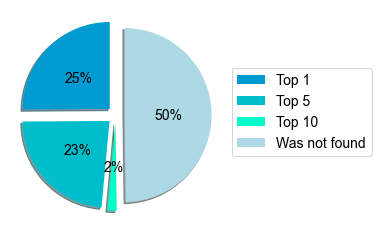

In [97]:
fig, ax = plt.subplots()
color_palette_list = ['#009BD0', '#00BDCC','#00FDCC','#ADD8E6']

plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor']= 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['font.size']=14

x = [top1.count(True), top5.count(True), top10.count(True), found.count(False)]
labels = ['Top 1', 'Top 5', 'Top 10' ,'Was not found']
_=ax.pie(x, colors=color_palette_list,
         autopct='%1.0f%%', shadow=True, startangle=90, pctdistance=0.5,labeldistance=1.3, explode=(0.1,0.1,0.1,0.1))
ax.legend(frameon=True, bbox_to_anchor=(1,0.75), labels=labels)

### Export Results

In [106]:
temp = pd.read_csv('../result-method-parliament-member-search.csv')
temp.head()

,Name,GoogleAPI Fullnames,GoogleAPI Surnames,TwitterAPI Fullnames,TwitterAPI Surnames,TwitterAPI SurnamesLatin
0,Βιλιάρδος Βασίλειος,True,True,False,True,True
1,Αλεξοπούλου Αικατερίνη,True,False,False,False,False
2,Αθανασίου Μαρία,True,False,False,False,False
3,Βαγενάς Δημήτριος,True,True,False,False,False
4,Ασημακοπούλου Χάιδω,False,False,False,True,False


In [99]:
temp['TwitterAPI SurnamesLatin'] = found

In [104]:
temp.to_csv('../result-method-parliament-member-search.csv', index=False)

In [105]:
del temp

## Without a Twitter Account 

In [107]:
target_names = ['Has an Account', 'Does not have a Account']

In [108]:
fn_noacc = fn[fn['Twitter Handle'] == 0].copy() 

In [109]:
correct = []
for i, acc in enumerate(fn_noacc['Twitter Handle']):
    if acc == fn_noacc['Result 1'].iloc[i]:
        correct.append(True)
    else:
        correct.append(False)         

In [110]:
correct.count(True), correct.count(False)

(4, 58)

## Final Results

In [111]:
fin_result = np.array([[found.count(True),correct.count(True)],
                      [found.count(False),correct.count(False)]])
fin_result

array([[119,   4],
       [119,  58]])

<AxesSubplot:>

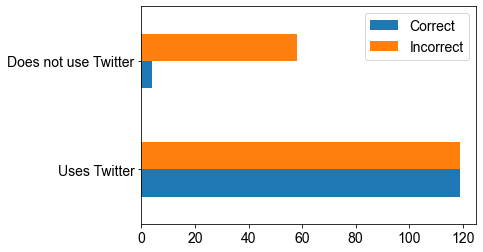

In [112]:
pd.DataFrame(fin_result, 
             columns=['Uses Twitter', 'Does not use Twitter'], 
             index=['Correct', 'Incorrect']).T.plot(kind='barh')

## Do Result Include other Parliament Members ?

In [113]:
par_accs = list(fn_acc['Twitter Handle'])

In [114]:
counts = [0 for i in range(len(fn))]
for i, tr in enumerate(fn['Twitter Handle']):
    for j,res in enumerate(fn[[f'Result {k+1}' for k in range(7)]].iloc[i].unique()):
        for acc in par_accs:
            if res == acc and res != tr:
                counts[i] += 1

In [115]:
fn['Total Parl Results'] = counts

In [116]:
len(fn[fn['Total Parl Results'] != 0])

6

# ClassifierND

# Fullnames

In [4]:
fn = pd.read_csv('Twitter-Search-Fullnames-ClassifierND-Parliament-Members.csv')
fn = fn.replace(np.nan, '')
fn.head()

,Name (Long),Surname,Name,Party,Twitter Handle,Result 1,Result 2
0,Βιλιάρδος Διονυσίου Βασίλειος,Βιλιάρδος,Βιλιάρδος Βασίλειος,ΕΛΛΗΝΙΚΗ ΛΥΣΗ,174226430,0,0
1,Αλεξοπούλου Κωνσταντίνου Αναστασία - Αικατερίνη,Αλεξοπούλου,Αλεξοπούλου Αικατερίνη,ΕΛΛΗΝΙΚΗ ΛΥΣΗ,1168241295149740038,0,0
2,Αθανασίου Ευαγγέλου Μαρία,Αθανασίου,Αθανασίου Μαρία,ΕΛΛΗΝΙΚΗ ΛΥΣΗ,1153988844498444288,0,0
3,Βαγενάς Κωνσταντίνου Δημήτριος,Βαγενάς,Βαγενάς Δημήτριος,ΕΛΛΗΝΙΚΗ ΛΥΣΗ,1302266183790604290,0,0
4,Ασημακοπούλου Δημητρίου Σοφία - Χάιδω,Ασημακοπούλου,Ασημακοπούλου Χάιδω,ΕΛΛΗΝΙΚΗ ΛΥΣΗ,1148229718627540992,0,0


In [5]:
result = []
for i in fn.index:
    temp = list(fn[['Result 1', 'Result 2']].iloc[i])
    temp = [item for item in temp if item != 0]
    if not temp:
        temp += [0,0]
    while len(temp) < 2:
        temp += [0]
    result.append(temp)

result = np.array(result)
fn['Result 1'] = result[:,0]
fn['Result 2'] = result[:,1]

## With a Twitter Account 

In [6]:
fn_acc = fn[fn['Twitter Handle'] != 0].copy() 

In [8]:
top1 = [False for i in range(len(fn_acc))]
top5 = [False for i in range(len(fn_acc))]
top10 = [False for i in range(len(fn_acc))]

for i, acc in enumerate(fn_acc['Twitter Handle']):
    for j,res in enumerate(fn_acc[[f'Result {k+1}' for k in range(2)]].iloc[i].unique()):
        if acc == res:
            if j < 1:
                top1[i] = True
            elif 0 < j < 6:
                top5[i] = True
            else:
                top10[j] = True

In [9]:
found = [a or b or c for a,b,c in zip(top1,top5,top10)]

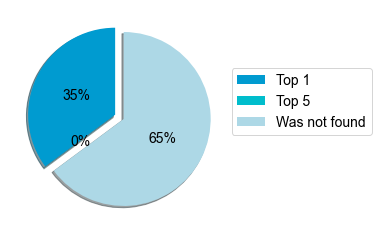

In [10]:
fig, ax = plt.subplots()
color_palette_list = ['#009BD0', '#00BDCC', '#ADD8E6']

plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor']= 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['font.size']=14

x = [top1.count(True), top5.count(True), found.count(False)]
labels = ['Top 1', 'Top 5' ,'Was not found']
_=ax.pie(x, colors=color_palette_list,
         autopct='%1.0f%%', shadow=True, startangle=90, pctdistance=0.5,labeldistance=1.3, explode=(0.01,0.01,0.1))
ax.legend(frameon=True, bbox_to_anchor=(1,0.75), labels=labels)

## Without a Twitter Account 

In [11]:
target_names = ['Has an Account', 'Does not have a Account']

In [12]:
fn_noacc = fn[fn['Twitter Handle'] == 0].copy() 

In [13]:
correct = []
for i, acc in enumerate(fn_noacc['Twitter Handle']):
    if acc == fn_noacc['Result 1'].iloc[i]:
        correct.append(True)
    else:
        correct.append(False)         

In [14]:
correct.count(True), correct.count(False)

(57, 4)

## Final Results

In [15]:
fin_result = np.array([[found.count(True),correct.count(True)],
                      [found.count(False),correct.count(False)]])
fin_result

array([[ 84,  57],
       [155,   4]])

<AxesSubplot:>

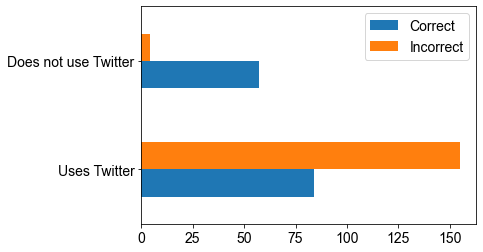

In [16]:
pd.DataFrame(fin_result, 
             columns=['Uses Twitter', 'Does not use Twitter'], 
             index=['Correct', 'Incorrect']).T.plot(kind='barh')

---
# Surnames

In [17]:
fn = pd.read_csv('Twitter-Search-Surnames-ClassifierND-Parliament-Members.csv')
fn = fn.replace(np.nan, '')
fn.head()

,Name (Long),Surname,Name,Party,Twitter Handle,Result 1,Result 2,Result 3,Result 4,Result 5
0,Βιλιάρδος Διονυσίου Βασίλειος,Βιλιάρδος,Βιλιάρδος Βασίλειος,ΕΛΛΗΝΙΚΗ ΛΥΣΗ,174226430,174226430,0,0,0,0
1,Αλεξοπούλου Κωνσταντίνου Αναστασία - Αικατερίνη,Αλεξοπούλου,Αλεξοπούλου Αικατερίνη,ΕΛΛΗΝΙΚΗ ΛΥΣΗ,1168241295149740038,0,93629265,0,0,0
2,Αθανασίου Ευαγγέλου Μαρία,Αθανασίου,Αθανασίου Μαρία,ΕΛΛΗΝΙΚΗ ΛΥΣΗ,1153988844498444288,965785002,2840171877,0,0,0
3,Βαγενάς Κωνσταντίνου Δημήτριος,Βαγενάς,Βαγενάς Δημήτριος,ΕΛΛΗΝΙΚΗ ΛΥΣΗ,1302266183790604290,0,0,0,0,0
4,Ασημακοπούλου Δημητρίου Σοφία - Χάιδω,Ασημακοπούλου,Ασημακοπούλου Χάιδω,ΕΛΛΗΝΙΚΗ ΛΥΣΗ,1148229718627540992,533041104,0,1148229718627540992,0,0


In [18]:
result = []
for i in fn.index:
    temp = list(fn[['Result 1', 'Result 2', 'Result 3', 'Result 4', 'Result 5']].iloc[i])
    temp = [item for item in temp if item != 0]
    if not temp:
        temp += [0,0,0,0,0]
    while len(temp) < 5:
        temp += [0]
    result.append(temp)

result = np.array(result)
fn['Result 1'] = result[:,0]
fn['Result 2'] = result[:,1]
fn['Result 3'] = result[:,2]
fn['Result 4'] = result[:,3]
fn['Result 5'] = result[:,4]

## With a Twitter Account 

In [19]:
fn_acc = fn[fn['Twitter Handle'] != 0].copy() 

In [26]:
top1 = [False for i in range(len(fn_acc))]
top5 = [False for i in range(len(fn_acc))]
top10 = [False for i in range(len(fn_acc))]

for i, acc in enumerate(fn_acc['Twitter Handle']):
    for j,res in enumerate(fn_acc[[f'Result {k+1}' for k in range(5)]].iloc[i].unique()):
        if acc == res:
            if j < 1:
                top1[i] = True
            elif 0 < j < 6:
                top5[i] = True
            else:
                top10[j] = True

In [27]:
found = [a or b or c for a,b,c in zip(top1,top5,top10)]

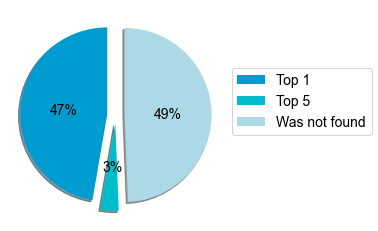

In [29]:
fig, ax = plt.subplots()
color_palette_list = ['#009BD0', '#00BDCC','#ADD8E6']

plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor']= 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['font.size']=14

x = [top1.count(True), top5.count(True), found.count(False)]
labels = ['Top 1', 'Top 5' ,'Was not found']
_=ax.pie(x, colors=color_palette_list,
         autopct='%1.0f%%', shadow=True, startangle=90, pctdistance=0.5,labeldistance=1.3, explode=(0.1,0.1,0.1))
ax.legend(frameon=True, bbox_to_anchor=(1,0.75), labels=labels)

## Without a Twitter Account 

In [30]:
target_names = ['Has an Account', 'Does not have a Account']

In [31]:
fn_noacc = fn[fn['Twitter Handle'] == 0].copy() 

In [32]:
correct = []
for i, acc in enumerate(fn_noacc['Twitter Handle']):
    if acc == fn_noacc['Result 1'].iloc[i]:
        correct.append(True)
    else:
        correct.append(False)         

In [33]:
correct.count(True), correct.count(False)

(52, 9)

## Final Results

In [34]:
fin_result = np.array([[found.count(True),correct.count(True)],
                      [found.count(False),correct.count(False)]])
fin_result

array([[121,  52],
       [118,   9]])

<AxesSubplot:>

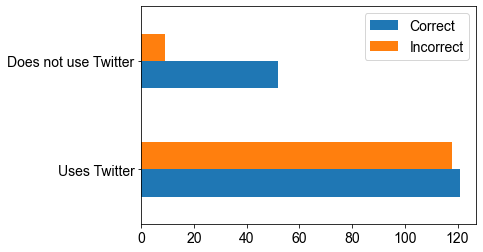

In [35]:
pd.DataFrame(fin_result, 
             columns=['Uses Twitter', 'Does not use Twitter'], 
             index=['Correct', 'Incorrect']).T.plot(kind='barh')

---
# Surnames Greeklish

In [36]:
fn = pd.read_csv('Twitter-Search-SurnamesLatin-ClassifierND-Parliament-Members.csv')
fn = fn.replace(np.nan, '')
fn.head()

,Name (Long),Surname,Name,Party,Twitter Handle,Result 1,Result 2,Result 3,Result 4,Result 5,...,Result 9,Result 10,Result 11,Result 12,Result 13,Result 14,Result 15,Result 16,Result 17,Result 18
0,Βιλιάρδος Διονυσίου Βασίλειος,Βιλιάρδος,Βιλιάρδος Βασίλειος,ΕΛΛΗΝΙΚΗ ΛΥΣΗ,174226430,174226430,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Αλεξοπούλου Κωνσταντίνου Αναστασία - Αικατερίνη,Αλεξοπούλου,Αλεξοπούλου Αικατερίνη,ΕΛΛΗΝΙΚΗ ΛΥΣΗ,1168241295149740038,0,1168241295149740032,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Αθανασίου Ευαγγέλου Μαρία,Αθανασίου,Αθανασίου Μαρία,ΕΛΛΗΝΙΚΗ ΛΥΣΗ,1153988844498444288,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Βαγενάς Κωνσταντίνου Δημήτριος,Βαγενάς,Βαγενάς Δημήτριος,ΕΛΛΗΝΙΚΗ ΛΥΣΗ,1302266183790604290,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Ασημακοπούλου Δημητρίου Σοφία - Χάιδω,Ασημακοπούλου,Ασημακοπούλου Χάιδω,ΕΛΛΗΝΙΚΗ ΛΥΣΗ,1148229718627540992,533041104,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
result = []
for i in fn.index:
    temp = list(fn[['Result 1', 'Result 2', 'Result 3', 'Result 4', 'Result 5']].iloc[i])
    temp = [item for item in temp if item != 0]
    if not temp:
        temp += [0,0,0,0,0]
    while len(temp) < 5:
        temp += [0]
    result.append(temp)

result = np.array(result)
fn['Result 1'] = result[:,0]
fn['Result 2'] = result[:,1]
fn['Result 3'] = result[:,2]
fn['Result 4'] = result[:,3]
fn['Result 5'] = result[:,4]

## With a Twitter Account 

In [38]:
fn_acc = fn[fn['Twitter Handle'] != 0].copy() 

In [39]:
top1 = [False for i in range(len(fn_acc))]
top5 = [False for i in range(len(fn_acc))]
top10 = [False for i in range(len(fn_acc))]

for i, acc in enumerate(fn_acc['Twitter Handle']):
    for j,res in enumerate(fn_acc[[f'Result {k+1}' for k in range(10)]].iloc[i].unique()):
        if acc == res:
            if j < 1:
                top1[i] = True
            elif 0 < j < 6:
                top5[i] = True
            else:
                top10[j] = True

In [40]:
found = [a or b or c for a,b,c in zip(top1,top5,top10)]

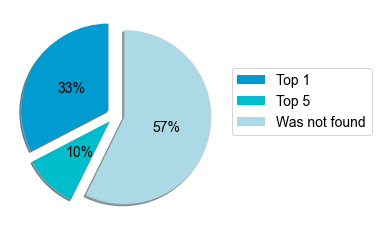

In [42]:
fig, ax = plt.subplots()
color_palette_list = ['#009BD0', '#00BDCC' ,'#ADD8E6']

plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor']= 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['font.size']=14

x = [top1.count(True), top5.count(True), found.count(False)]
labels = ['Top 1', 'Top 5', 'Was not found']
_=ax.pie(x, colors=color_palette_list,
         autopct='%1.0f%%', shadow=True, startangle=90, pctdistance=0.5,labeldistance=1.3, explode=(0.1,0.1 ,0.1))
ax.legend(frameon=True, bbox_to_anchor=(1,0.75), labels=labels)

## Without a Twitter Account 

In [43]:
target_names = ['Has an Account', 'Does not have a Account']

In [44]:
fn_noacc = fn[fn['Twitter Handle'] == 0].copy() 

In [45]:
correct = []
for i, acc in enumerate(fn_noacc['Twitter Handle']):
    if acc == fn_noacc['Result 1'].iloc[i]:
        correct.append(True)
    else:
        correct.append(False)         

In [46]:
correct.count(True), correct.count(False)

(57, 4)

## Final Results

In [47]:
fin_result = np.array([[found.count(True),correct.count(True)],
                      [found.count(False),correct.count(False)]])
fin_result

array([[102,  57],
       [137,   4]])

<AxesSubplot:>

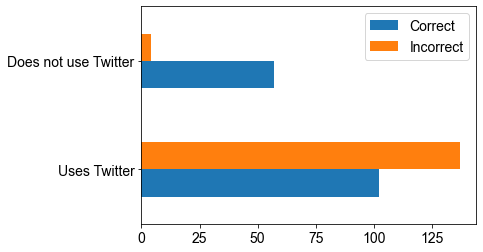

In [48]:
pd.DataFrame(fin_result, 
             columns=['Uses Twitter', 'Does not use Twitter'], 
             index=['Correct', 'Incorrect']).T.plot(kind='barh')